## Data Analytics Lab (2nd Week)

### Probability Distribution, Moments, Visualisation, Data Generation, Parameter Estimation, Hypothesis Testing, Correlation

### Basic moments of one-dimensional data and visualisation

Implement functions to compute median, mode, sample mean, sample variance, standard deviation of one-dimensional data 
"without using numpy". 

Example :
data1 = np.array([1,2,3,4,5])

data1_median = median(data1)

data1_mode = mode(data1)

data1_mean = mean(data1)

data1_variance = variance(data1)

data1_stddev = stddev(data1)

In [1]:
# import dependencies
import numpy as np
np.random.seed(12)
data_q1 = np.random.randint(0,100,1000)

def avg(arr) :
    return np.sum(arr)/arr.shape[0]

def variance(arr) :
    return avg(arr**2) - avg(arr)**2

def stddev(arr) :
    return np.sqrt(variance(arr))
    
def median(arr) :
    sorted_arr = np.sort(arr)
    ################# checking if the array length is even or odd to use the formula accordingly ##########
    if arr.shape[0] % 2 == 0 :
        center1 , center2 = int(arr.shape[0]/2) , int(arr.shape[0]/2 -1) 
        return (sorted_arr[center1] + sorted_arr[center2]) /2
    else :
        center = int((arr.shape[0]-1)/2) 
        return sorted_arr[center]

def mode(arr):
    list_arr = list(set(arr))
    freq_arr = np.zeros(len(list_arr))
    ################## calculating the frequency of each number present in the data ###################
    for i in range(arr.shape[0]) :
        freq_arr[list_arr.index(arr[i])] = freq_arr[list_arr.index(arr[i])] + 1
    max_freq = np.max(freq_arr)
    max_freq_number = list_arr[np.argmax(freq_arr)]
    return max_freq_number , max_freq 


Compute the above for different one-dimensional datasets - data1.txt, data2.txt, data3.txt, data4.txt and store as data1_median, data2_median etc. Verify the results using the numpy built in functions for mean,stddev and variance.

In [3]:
from scipy import stats
# mean
print('Estimated Mean of data 1 : ' , avg(data_q1))
print('Mean using the numpy formula of data 1 : ' , np.mean(data_q1))
print('\n')
# median
print('Estimated Median of data 1: ' , median(data_q1))
print('Median using the numpy formula of data 1 : ',np.median(data_q1))
print('\n')
# mode
print('Estimated Mode for data 1 : Integer with the highest count :',mode(data_q1)[0] ,' Frequency of highest occuring integer : ',mode(data_q1)[1])
print('Mode using the numpy formula of data 1 : ', stats.mode(data_q1))
print('\n')
# variance
print('Estimated Variance of data 1 : ' , variance(data_q1))
print('Variance using the numpy formula for data 1 : ',np.var(data_q1),'\n')
#stddev
print('Estimated Standard Deviation of data 1 : ' , stddev(data_q1))
print('Standard Deviation using the numpy formula of data 1 : ',np.std(data_q1),'\n')


Estimated Mean of data 1 :  50.637
Mean using the numpy formula of data 1 :  50.637


Estimated Median of data 1:  51.0
Median using the numpy formula of data 1 :  51.0


Estimated Mode for data 1 : Integer with the highest count : 53  Frequency of highest occuring integer :  20.0
Mode using the numpy formula of data 1 :  ModeResult(mode=array([53]), count=array([20]))


Estimated Variance of data 1 :  795.9612309999998
Variance using the numpy formula for data 1 :  795.9612309999999 

Estimated Standard Deviation of data 1 :  28.212784885579797
Standard Deviation using the numpy formula of data 1 :  28.212784885579797 



Visualize all the datasets (1-4) separately using matplotlib scatter plot and histograms. 

1. Comment on initial observations of distributions. 

2. For each dataset, specify which descriptive statistics best describe the data.

Example :

data1 - mean

data2 - mean

data3 - mean

data4 - mean

Hints: If you want to plot a known distribution (Normal,Unifrom, Exponential etc) using matplotlib, define it as a function 
and plot it. For this, you need to know the formula of the chosen distribution. If you dont know the exact distribution 
of a dataset, plot it as a histogram and smooth the data by converting bin edges to centres. Using seaborn library: 
    Install seaborn library and use $\texttt{distplot()}$ function to plot the distribution and verify the result.

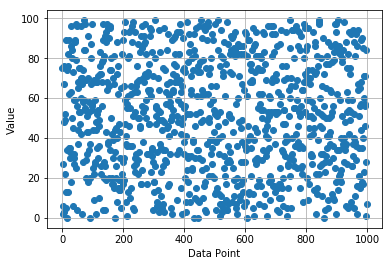

In [5]:
# visualization by scatter plot
import matplotlib.pyplot as plt
plt.figure(0)
plt.scatter(np.arange(0,data_q1.shape[0]),data_q1)
plt.grid()
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.show()

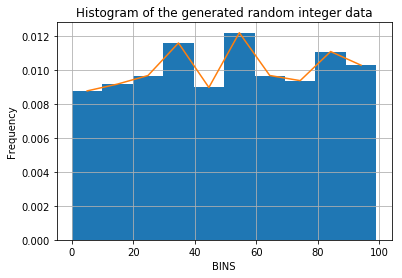

This resembles a uniform distribution


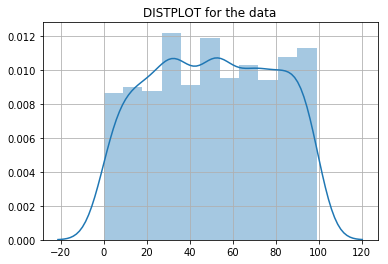

In [7]:
# histogram plot
import seaborn

n , x , _ = plt.hist(data_q1,10 ,density = True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges
plt.xlabel('BINS')
plt.ylabel('Frequency')
plt.title('Histogram of the generated random integer data')
plt.grid()
plt.show()
print('This resembles a uniform distribution')

seaborn.distplot(data_q1)
plt.grid()
plt.title('DISTPLOT for the data')
plt.show()

The distribution fits a multimodal data. An appropriate measure of central tendency here is the median.

### Probability Distribution parameters and visualisation

Uniform Distribution: A uniform distribution, also called a rectangular distribution, is a probability distribution that has constant probability. This distribution is defined by two parameters, a and b: a is the minimum and b is the maximum.

Formula: 
\begin{align*}
f(x) = \frac{1}{b-a} , a \leq x \leq b
\end{align*}
Parameters:  $\text{Mean} = \frac{(a+b)}{2} ; \text{Variance} = \frac{1}{12(b-a)^2}$


Gaussian Distribution: The normal distribution is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. For mean, $\mu$ and standard deviation, $\sigma$, the formula is given as
\begin{align*}
f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
\end{align*}

Use the random.normal() method to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.

Given a normal distribution of mean = 3 and standard deviation = 1. 
1. Find $P(x\leq3)$ from the given distribution. 
2. Find the probability that $P(3\lt x\leq5)$ drawn from the given distribution. 
Write a function to estimate the above cumulative distribution function of a normal distribution. Verify the same.
 

In [8]:
np.random.seed(299)
data_norm = np.random.normal(3,1,10000)
# 1. Find  p(x<3)  from the given distribution

# 2. Find the probability that p(3<x<=5)  drawn from the given distribution

# Function for estimating cdf

def estimateCDF(x, a= None, b = None):
    """
    PARAMETERS:
    x : input 1D data
    a, b: data points at which cdf is to be estimated 
    
    RETURNS:
    cdf : cumulative distibution values s.t. P(a<x<=b)  
    """
    ############### checking if both a and b are passed in the function #################
    if b is not None and a is not None:
        cdf_a = np.sum(x<a)/x.shape[0]
        cdf_b = np.sum(x<b)/x.shape[0]
        return cdf_b - cdf_a
    elif b is None and a is not None :
        cdf_a = np.sum(x<a)/x.shape[0]
        return cdf_a
print('P(x<=3) = ',estimateCDF(data_norm , 3))
print('P(3<x<=5) = ',estimateCDF(data_norm , 3 , 5))

P(x<=3) =  0.4994
P(3<x<=5) =  0.48059999999999997


### Maximum Likelihood Estimation for normal distribution : 
A method of estimating the parameters of a distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. For normal distribution, $f(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$, the goal is to determine $\mu$ and $\sigma$ for our data so that we can match our data to its most likely Gaussian bell curve. The estimated mean, $\hat{\mu}$ for normal distribution is  $\hat{\mu} = \frac{1}{n}\sum_{i=1}^nx_i$ and the estimated standard deviation is $\hat{\sigma} = \sqrt{ \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2}$.

Assuming that data1 has been sampled from normal distribution with unknown mean and standard deviation of 2, calculate $95\%$ confidence interval of data1_mean.

In [10]:
import numpy as np
np.random.seed(2)
unknown_mean = np.random.randint(-50,50)
data_unknown = np.random.normal(unknown_mean,2,1000)

print('Unknown Mean : ',unknown_mean)
data_unknown_mean = avg(data_unknown)
data_unknown_standard_deviation = stddev(data_unknown)

############### for 95% confidence interval is 1.96 ##########################
z_conf_interval = 1.96
############### Here, I assumed by 95% confidence interval you were meaning mean(x) = calculated mean +-(z*stddev/sqrt(n))
lower_estimate_mean = data_unknown_mean - (z_conf_interval * data_unknown_standard_deviation / np.sqrt(data_unknown.shape[0]))
upper_estimate_mean = data_unknown_mean + (z_conf_interval * data_unknown_standard_deviation / np.sqrt(data_unknown.shape[0]))
print('\n------------------------------------------------------\n')
print('Confidence Interval : 95%')
print('Lower Estimate for Mean : ',lower_estimate_mean)
print('Upper Estimate for Mean : ',upper_estimate_mean)

Unknown Mean :  -10

------------------------------------------------------

Confidence Interval : 95%
Lower Estimate for Mean :  -10.114719457980296
Upper Estimate for Mean :  -9.862643274159687


### Parameter estimation

In this section you will fit data to a standard distribution.

Normal distribution 
"DataSet1.txt" is to be fitted to normal distribution. Complete the function fitNormal() to estimate parameters.

In [11]:
def fitNormal(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    mu : mean of distribution
    sig : standard deviation of distribution
    """
    mu = np.sum(x)/x.shape[0]
    sig = np.sqrt(np.sum((x-mu)**2)/x.shape[0])
    return [mu, sig]
    

Read the file "DataSet1.txt" into a variable $\texttt{data1}$. Also plot a histogram of the same. Then pass it to $\texttt{fitNormal()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution. Use $\texttt{numpy.linspace()}$ to generate 1000 points in the range of $\texttt{data1}$. The probabilities are estimated from Gaussian distribution formula. Make a lineplot in the same figure.

Estimated Mean :  28.48864870364574
Estimated Standard Deviation :  48.130954258166945
From the histogram , we can visualize that the distribution could be a normal distribution


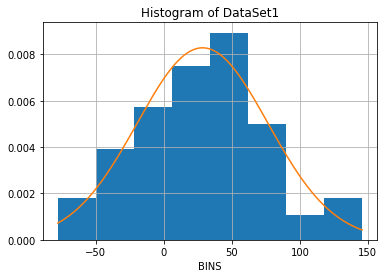

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Read datafile
data1 = np.loadtxt('DataSet1.txt')
# Plot histogram of input data
plt.figure(0)
plt.hist(data1 , 8 , density = True)
plt.xlabel('BINS')
plt.title('Histogram of DataSet1')
plt.grid()
# Fit data to normal distribution
mean , stddev = fitNormal(data1)
linx = np.linspace(min(data1),max(data1),1000)
plt.plot(linx , stats.norm(mean , stddev).pdf(linx))
print('Estimated Mean : ',mean)
print('Estimated Standard Deviation : ',stddev)
print('From the histogram , we can visualize that the distribution could be a normal distribution')
# Generate data using estimated parameters for visualization and plot the same
plt.show()

"DataSet2.txt" is to be fitted to uniform distribution. Complete the function fitUniform() to estimate parameters. Generate and plot data as before.

In [13]:
def fitUniform(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    a : minimum value of distribution
    b : maximum value of distribution
    """
    a = np.min(x)
    b = np.max(x)
    return [a, b]

Read the file "DataSet2.txt" into a variable "data2". Also plot a histogram of the same. Then pass it to $\texttt{fitUniform()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution.

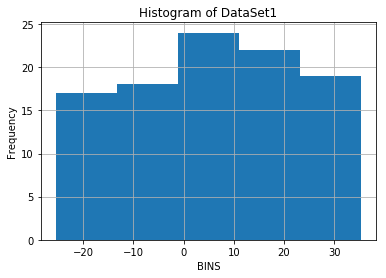

estimated min value from data :  -25.35019033650153
estimated max value from data :  35.22440384842628


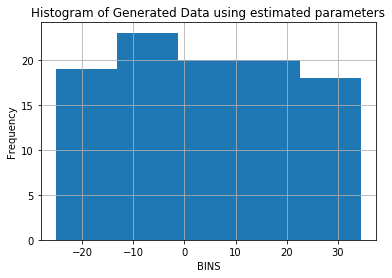

In [15]:
# Read datafile
data2 = np.loadtxt('DataSet2.txt')
# Plot histogram of input data
plt.figure(0)
plt.xlabel('BINS')
plt.ylabel('Frequency')
plt.title('Histogram of DataSet1')
plt.grid()
plt.hist(data2  , 5 )
plt.show()
# Fit data to normal distribution
min_data , max_data = fitUniform(data2)
print('estimated min value from data : ',min_data)
print('estimated max value from data : ',max_data)

# Generate data using estimated parameters for visualization and plot the same
np.random.seed(10)
generated_data2 = np.random.uniform(min_data,max_data,data2.shape[0])
plt.figure(1)
plt.xlabel('BINS')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Data using estimated parameters')
plt.grid()
plt.hist( generated_data2, 5)
plt.show()

## Correlation

In this section you are required to measure correlation between two variables. The dataset "**AirQualityData.csv**" contains daily readings of $\text{PM}_{10}$ and $O_3$ concentration in air along with temperature readings. To verify if the variation concentration of any of these pollutants is associated with temperature changes, measure the correlation between temperature and each of these pollutants. Complete the function $\texttt{correlationCoeff()}$ below that measures the correlation coefficient between two given time-series data. For a given n two data sets x and y, the Pearson coefficient formula is given as

\begin{align*}
    r_{xy} = \frac{cov(X,Y)}{\sigma(X)\cdot \sigma(Y)}
\end{align*}
$cov(X,Y) = \frac{\Sigma_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n-1}; \\ $ 
$\sigma(X), \sigma(Y)$ are respective standard deviations


In [16]:

def correlationCoeff(x, y):
    """
    PARAMETERS:
    x : input 1D data
    y : input 1D data
    
    RETURNS:
    est : coefficient value
    """
    mu_x = np.sum(x)/x.shape[0]
    mu_y = np.sum(y)/y.shape[0]
    
    stddev_x = np.sqrt(np.sum((x - mu_x)**2)/x.shape[0])
    stddev_y = np.sqrt(np.sum((y - mu_y)**2)/y.shape[0])
    
    cov_xy = 0
    if x.shape[0] == y.shape[0] :
        cov_xy = np.sum((x - mu_x)*(y - mu_y))/(x.shape[0] - 1) 
        est = cov_xy/(stddev_x * stddev_y)
        return est
    else : 
        print('Mismatch in array sizes cant compute correlation')
        return None
    
    

Read the file "AirQualityData.csv" . Ignoring the "date" column, read columns "temp", "pm10" and "o3" as the dataframe as pass them to the function $\texttt{correlationCoeff()}$ to estimate seperately the effect of "pm10" on "temp" and "o3" on "temp". Which of the pollutants has a greater impact on temperature? Compare the value that you get from the above function with the python built in function $\texttt{df.corr()}$ . 

In [17]:
# Read datafile
import pandas as pd
data_air_quality = pd.read_csv('AirQualityData.csv')
temp_arr = np.array(data_air_quality['temp'])
pm10_arr = np.array(data_air_quality['pm10'])
o3_arr = np.array(data_air_quality['o3'])

# Estimate correlation
print('Correlation between temperature and O3 estimated using written code : ',correlationCoeff(temp_arr,o3_arr))
print('Correlation between temperature and PM10 estimated using written code : ',correlationCoeff(temp_arr,pm10_arr))
print('\nFrom the above values, it is evident that O3 has a higher correlation to temperature than PM10 and thus O3 has higher impact on temperature')
temp_o3 = data_air_quality[['temp','o3']]
temp_pm10 = data_air_quality[['temp','pm10']]
print('\n---------------------------------------------------------\n')
print('Correlation between temperature and O3 using inbuilt function :')
print(temp_o3.corr())
print('Correlation between temperature and PM10 using inbuilt function :')
print(temp_pm10.corr())

Correlation between temperature and O3 estimated using written code :  0.570390422149566
Correlation between temperature and PM10 estimated using written code :  0.36248659213981366

From the above values, it is evident that O3 has a higher correlation to temperature than PM10 and thus O3 has higher impact on temperature

---------------------------------------------------------

Correlation between temperature and O3 using inbuilt function :
          temp        o3
temp  1.000000  0.570239
o3    0.570239  1.000000
Correlation between temperature and PM10 using inbuilt function :
          temp      pm10
temp  1.000000  0.362391
pm10  0.362391  1.000000


### Hypothesis Testing and Confidence Interval 

P Value: A p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results. This is also termed ‘probability value’ or ‘asymptotic significance’. The null hypothesis states that two measured phenomena experience no relationship to each other. We denote this as H or H0. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis.

Example: One such null hypothesis can be that the number of hours spent in the office affects the amount of salary paid. For a significance level of 5%, if the p-value falls lower than 5%, the null hypothesis is invalidated. Then it is discovered that the number of hours you spend in your office will not affect the amount of salary you will take home. 

T Test: Such a test tells us whether a sample of numeric data strays or differs significantly from the population. It also talks about two samples- whether they’re different. In other words, it gives us the probability of difference between populations.

In [18]:
# Install scipy library 
# import scipy.stats
# Use the function stats.ttest_ind() 
from scipy import stats
import numpy as np 

KS Test: KS Test in Python Statistics: This is the Kolmogorov-Smirnov test. It lets us test the hypothesis that the sample is a part of the standard t-distribution. Let’s take an example.

In [19]:
#Use the function stats.kstest(x,y) to compare the two distributions x and y 
print(stats.ks_2samp(data1,data2))
print('From the pvalue, we can reject the null hypothesis that the distributions are identical with 95% confidence interval since the pvalue is < 0.05')

Ks_2sampResult(statistic=0.46, pvalue=6.422179651064002e-10)
From the pvalue, we can reject the null hypothesis that the distributions are identical with 95% confidence interval since the pvalue is < 0.05


In [20]:
#Example
#Generate 10,000 random data from a normal distribution of mean 0 and standard 1 with a random seed value of 10.
# Use KS test to compare the generated data to a normal distribution using kstest
#if the p-value is less than 0.05 or 5% (for a 95% confidence level), then the null hypothesis is rejected, 
#which means the generated data is not from the normal distribution

In [24]:
np.random.seed(10)
data = np.random.normal(0 , 1 , 10000)
print(stats.kstest(data , 'norm'))
print('From the pvalue, we can say that null hypothesis that the distribution is normal is not rejected with 95% confidence interval since the pvalue is > 0.05')

KstestResult(statistic=0.008418461238842267, pvalue=0.4777893822483902)
From the pvalue, we can say that null hypothesis that the distribution is normal is not rejected with 95% confidence interval since the pvalue is > 0.05


In [25]:
#Example 
# Generate 10,000 random data from a poisson distribution of lambda = 5
# Generate 7,000 random data from a poisson distribution of lambda = 7
# compare the mean of the two data sets using t test with a confidence level of 95%.

In [26]:
poi1 = np.random.poisson(7,10000)
poi2 = np.random.poisson(5,7000)

print(stats.ttest_ind(poi1,poi2))
print('Since the p value is 0, we can say that the null hypothesis is rejected that the means of both the underlying distributions are identical with 95% confidence level since the p value is < 0.05')

Ttest_indResult(statistic=51.867377896123934, pvalue=0.0)
Since the p value is 0, we can say that the null hypothesis is rejected that the means of both the underlying distributions are identical with 95% confidence level since the p value is < 0.05
